In [1]:
import os, sys
%matplotlib inline
import matplotlib.pyplot as plt
import math, random
import skimage.io
import cv2

ROOT_DIR = '/home/wangwenzhe/tf-faster-rcnn-rddc'
ANALYSIS_DIR = os.path.join(ROOT_DIR, 'analysis')

/home/wangwenzhe/tf-faster-rcnn/python3_env/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# use my trained model to predict the training data and analysis the results

# for convenience, transform the results to a txtfile first
file_name_truth = 'window_file_voc2007_trainval.txt'
file_name = 'window_file_voc2007_trainval_output.txt'

# load the annotations
bboxs_truth = []
anno_truth_dict = {}
with open(os.path.join(ANALYSIS_DIR, file_name_truth)) as f:
    im_name = f.readline().strip()
    while(im_name):
        obj_num = int(f.readline().strip())
        for i in range(obj_num):
            bboxs_truth.append(f.readline().strip().split(' '))
        anno_truth_dict[im_name] = bboxs_truth[-obj_num:] if obj_num > 0 else []
        im_name = f.readline().strip()

# load my annotation results
bboxs = []
anno_dict = {}
with open(os.path.join(ANALYSIS_DIR, file_name)) as f:
    im_name = f.readline().strip()
    while(im_name):
        obj_num = int(f.readline().strip())
        for i in range(obj_num):
            bboxs.append(f.readline().strip().split(' '))
        anno_dict[im_name] = bboxs[-obj_num:] if obj_num > 0 else []
        im_name = f.readline().strip()

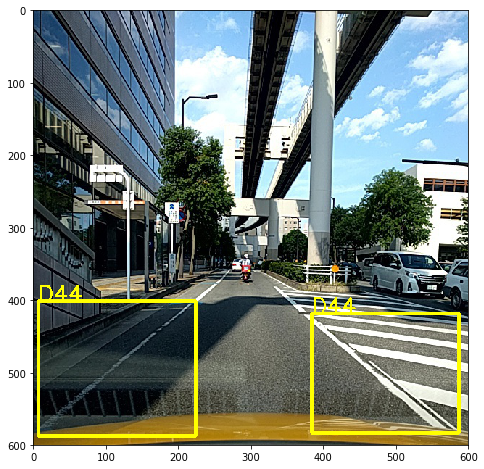

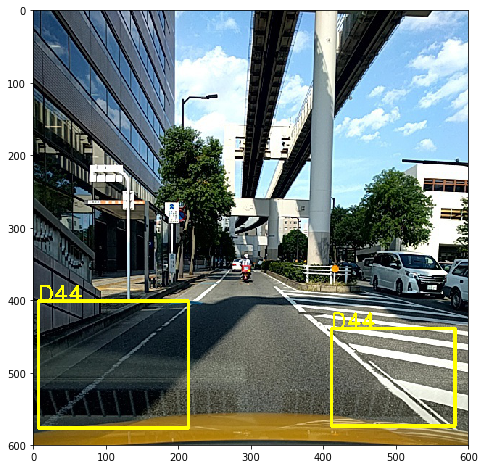

In [6]:
category = ['D00', 'D01', 'D10', 'D11', 'D20', 'D40', 'D43', 'D44']

# choose an image at random
file_names = list(anno_truth_dict.keys())
im_name = random.choice(file_names)

# visualization of the true detection results of the sample image
image = skimage.io.imread(im_name)
for a in anno_truth_dict[im_name]:
    cv2.rectangle(image, (int(a[1]),int(a[2])), (int(a[3]),int(a[4])), (255,255/8*int(a[0]),0), 3)
    cv2.putText(image, category[int(a[0])-1], (int(a[1]),int(a[2])), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255/8*int(a[0]),0), 2)
plt.figure(figsize=(8,8))
plt.imshow(image)

# visualization of my detection results of the sample image
image = skimage.io.imread(im_name)
for a in anno_dict[im_name]:
    cv2.rectangle(image, (int(a[1]),int(a[2])), (int(a[3]),int(a[4])), (255,255/8*int(a[0]),0), 3)
    cv2.putText(image, category[int(a[0])-1], (int(a[1]),int(a[2])), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255/8*int(a[0]),0), 2)
plt.figure(figsize=(8,8))
plt.imshow(image)